# First Project

In [359]:
from pymonntorch import *
import torch

import matplotlib.pyplot as plt

from hw1.code.currents import ConstantCurrent, StepFunction, SinCurrent
from hw1.code.models import LIF, ELIF,AELIF
from hw1.code.time_res import TimeResolution

# 1) LIF

In [360]:
net = Network(tag="main-net",
            behavior={1: TimeResolution(dt=1), })

In [361]:
pop1 = NeuronGroup(
    net=net,
    size=1,
    behavior={
        2: ConstantCurrent(value=10),
        3: LIF(R=5,
               tau=10,
               threshold=-37,
               u_rest=-67,
               u_reset=-75,
               ),
        4: Recorder(variables=["u", "I"], tag="ng1_rec"),
        5: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

In [363]:
net.initialize()
net.simulate_iterations(iterations=100)

Network['main-net', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=10,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_event,)}
100xBatch: 1/1 (100%) 50.692ms


50.691843032836914

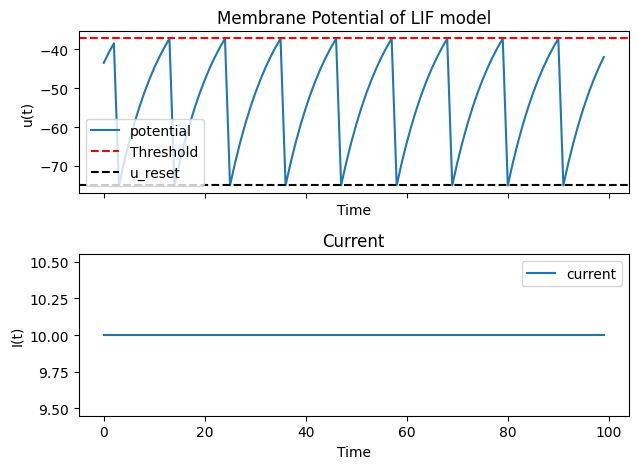

In [364]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(net["ng1_rec", 0].variables["u"][:, :3], label='potential')
ax1.axhline(y=pop1.behavior[3].init_kwargs['threshold'], color='r', linestyle='--', label='Threshold')
ax1.axhline(y=pop1.behavior[3].init_kwargs['u_reset'], color='black', linestyle='--', label='u_reset')
ax1.set_xlabel('Time')
ax1.set_ylabel('u(t)')
ax1.set_title('Membrane Potential of LIF model')
ax1.legend()

ax2.plot(net["ng1_rec", 0].variables["I"][:, :3], label="current")
ax2.set_xlabel('Time')
ax2.set_ylabel("I(t)")
ax2.set_title('Current')
ax2.legend()
plt.tight_layout()

plt.show()